In [1]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [2]:
centers=[[0.5,-0.5],[-0.5,0.5]]
X,y=make_blobs(cluster_std=0.4,n_samples=100,random_state=123,centers=centers,)
X_data=torch.tensor(X,dtype=torch.float)
y_data=torch.tensor(y,dtype=torch.float)

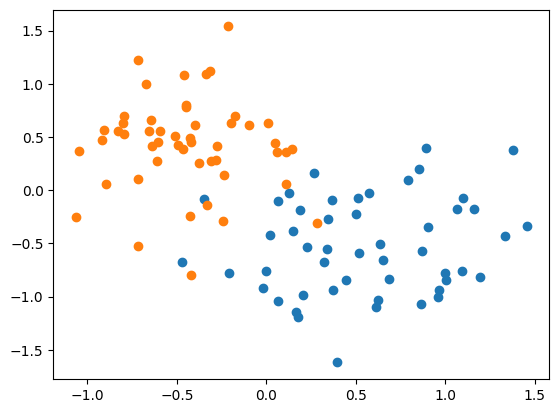

In [3]:
def scatter():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
scatter()

In [4]:

class Model(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        pred=torch.sigmoid(self.linear(x))
        return pred


In [5]:
torch.manual_seed(2)
model=Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
[w,b]=model.parameters()
w1,w2=w.view(2)
# print(w1.item(),w2.item(),b.item())
def get_params():
  return (w1.item(),w2.item(),b.item())

In [7]:
def plot_fit(title):
  plt.title=title
  # 0=w1x1+w2x2+b
  w1,w2,b1=get_params()
  x1=np.array([-2.0,2.0])
  x2=(w1*x1+b1)/-w2
  plt.plot(x1,x2,'r')
  scatter()

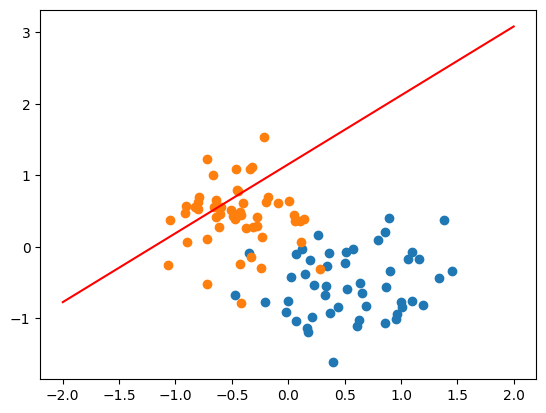

In [8]:
plot_fit('initial model')

In [9]:
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
epochs=1000

In [10]:
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criterion(y_pred,y_data.view(-1,1))
  print(f'epoch:{i} loss:{loss.item()}')
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0 loss:0.7833930850028992
epoch:1 loss:0.7818881273269653
epoch:2 loss:0.7803879380226135
epoch:3 loss:0.7788926959037781
epoch:4 loss:0.7774021029472351
epoch:5 loss:0.775916337966919
epoch:6 loss:0.7744354009628296
epoch:7 loss:0.772959291934967
epoch:8 loss:0.771487832069397
epoch:9 loss:0.7700211405754089
epoch:10 loss:0.7685592770576477
epoch:11 loss:0.7671020030975342
epoch:12 loss:0.7656494975090027
epoch:13 loss:0.7642015814781189
epoch:14 loss:0.7627584338188171
epoch:15 loss:0.7613198757171631
epoch:16 loss:0.7598860859870911
epoch:17 loss:0.7584568858146667
epoch:18 loss:0.7570323348045349
epoch:19 loss:0.7556124329566956
epoch:20 loss:0.7541969418525696
epoch:21 loss:0.7527862787246704
epoch:22 loss:0.7513800263404846
epoch:23 loss:0.7499783039093018
epoch:24 loss:0.7485814094543457
epoch:25 loss:0.7471888065338135
epoch:26 loss:0.745800793170929
epoch:27 loss:0.7444172501564026
epoch:28 loss:0.7430382370948792
epoch:29 loss:0.7416639924049377
epoch:30 loss:0.74029380

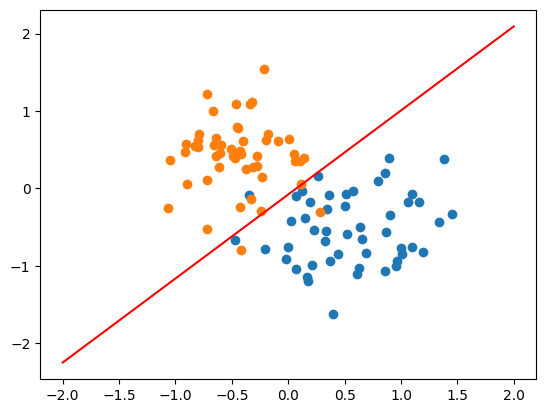

In [11]:
plot_fit('trained model')

Text(0.5, 0, 'epoch')

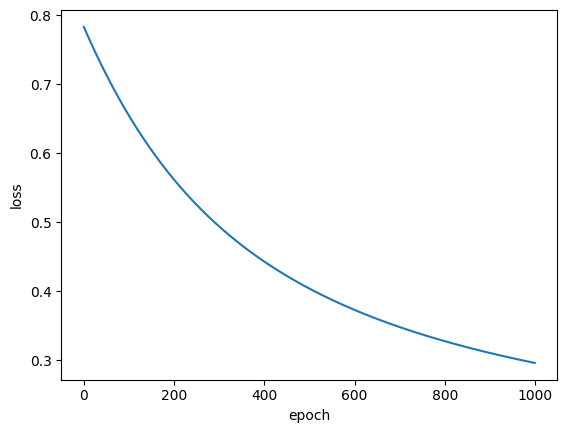

In [12]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')